## Gradient Descent From Scratch with Python

In this project, I am implementing gradient descent by training a linear regression model to predict tomorrow's weather (temperatur) based on today's temperature

#### Model Development

In [99]:
# Import pandas
import pandas as pd

# Read data into a python df
path = "../data/clean_weather.csv"
data = pd.read_csv(path, index_col=0)
data = data.ffill()

# View first 5 rows
data.head()

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [100]:
# Check shape of the data (no. rows and columns present)
data.shape

(13509, 4)

Since tmax is today's weather (X) and tmax_tomorrow is tomorrow's weather (Y). We can check the relationship between these two variables using a scatter plot.

$\hat{y} = w_{1} * x_{1} + b$ ---> single predictor variable

$\hat{y} = w_{1} * x_{1} + w_{2} * x_{2} + b$ ---> multiple predictor variables

$\hat{y}$ --> predicted variable
$w$ --> weight, 
$x$ --> predictor variable, 
$b$ --> bias

---> This is the equation of the linear regression model

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

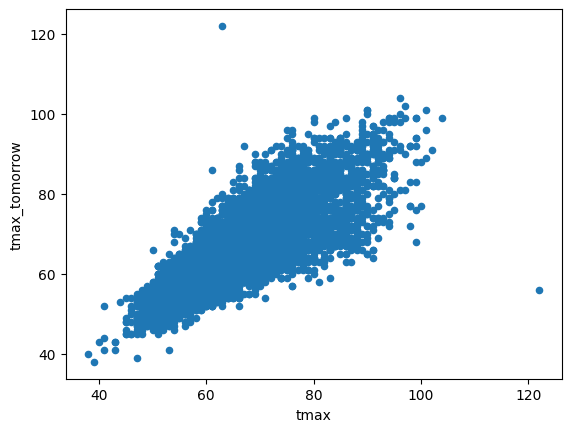

In [101]:
# Create scatter plot to show relationship between tmax and tmax_tomorrow
data.plot.scatter("tmax", "tmax_tomorrow")

As can be seen, there is a line that could be drawn to follow the shape of the data. (Line plot drawn below).

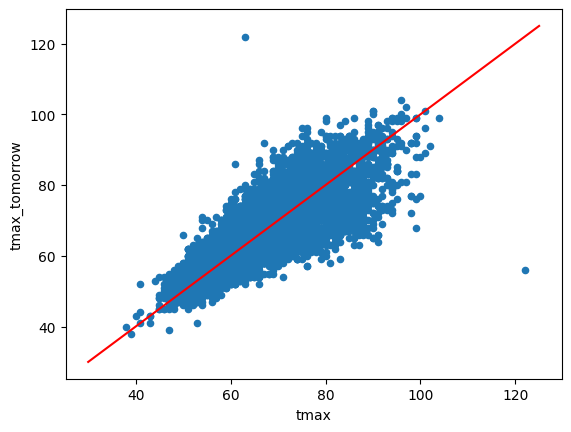

In [102]:
# Import Python's plotting library
import matplotlib.pyplot as plt

# Plot scatter again
data.plot.scatter("tmax", "tmax_tomorrow")

# Plot line
plt.plot([30, 125], [30,125], "red")

As can be seen, the line goes through the data pretty well. We can therefore use this line to make predictions for tmax_tomorrow (tomorrow's data).

Based on this linear relationship, using a tmax_tomorrow prediction would be the same as tmax.

In [103]:
# Import the linear regression model from sklearn
from sklearn.linear_model import LinearRegression

# Intialize the linear regression class
lm = LinearRegression()

# Train data - this will fit the linear regression algorithm
lm.fit(data[["tmax"]], data["tmax_tomorrow"])

LinearRegression()

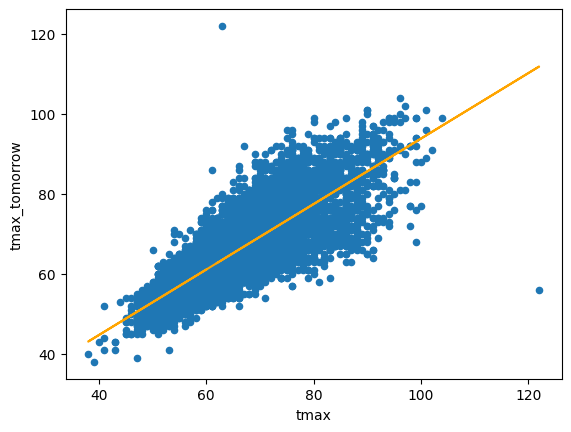

In [104]:
# Plot the scatter that shows the relationship between tmax and tmax_tomorrow
data.plot.scatter("tmax", "tmax_tomorrow")

# Plot the generated line by the regression model
plt.plot(data["tmax"], lm.predict(data[["tmax"]]), "orange")

Take a look at the coefficients of the model, the weight and the bias. This is done to see how th eline is actually defined.

In [105]:
print(f"Weight : {lm.coef_[0]:.2f}")
print(f"Bias : {lm.intercept_:.2f}")

Weight : 0.82
Bias : 11.99


In [106]:
# Make a prediction using the weight and the bias
tmax_tomorrow = 25 * .82 + 11.99
print(f"The predicted temperature is : {tmax_tomorrow} degrees C")

The predicted temperature is : 32.49 degrees C


#### Measuring Loss

Now the model has been developed. To make iot better, the error or loss of the prediction needs to be determined. This is determined by looking at the difference between the actual tmax_tomorrow and the predicted tmax_tomorrow. The average accross all all weather prediction errors is the overall loss.

This is defined at the mean_squared_error:

$MSE = (\hat{y} - y) ^ 2$

In [107]:
# Set a test tmax_tomorrow and use the predicted 
# temperature to calcuated the error
mse = (32.49 - 32.2) ** 2
print(f"The mean squared error is : {mse}")

The mean squared error is : 0.08409999999999951


Note: If the predicted temperature is close to the actual temperature, then MSE will be smaller, if the difference between the predicted and the actual temeprature is larger, then the error will be larger.

Using gradient descent, we can determine how to get the MSE to be as small as possible, i.e., how to get the predicted temperature to be as close as possible to the actual temperature.

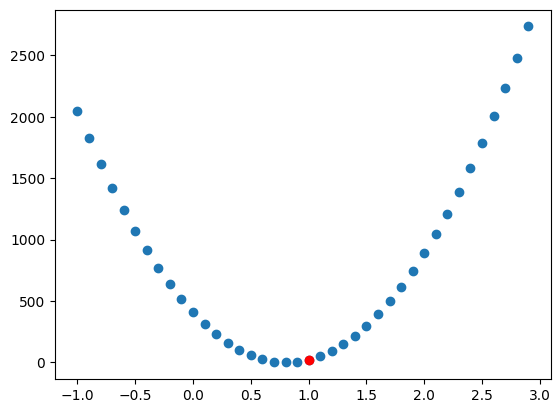

In [108]:
# Import numpy
import numpy as np

# Create a loss function - this function takes 
# in a weight (w) and a actual temperature value (y)
# and tells us what the error/loss is
loss = lambda w, y: ((w * 25 + 11.99) - y) ** 2

# Set tomorrow's actual temperature
y = 32.2

# Create an array of potential weights
ws = np.arange(-1, 3, .1) # - 1, -.9, -.8, ...., 2.9, 3

# Calculate loss for each weight
losses = loss(ws, y)

# Plot the losses
plt.scatter(ws, losses)
plt.plot(1, loss(1, y), "ro")

Let's get the rate of change of the loss (also known as the gradient)

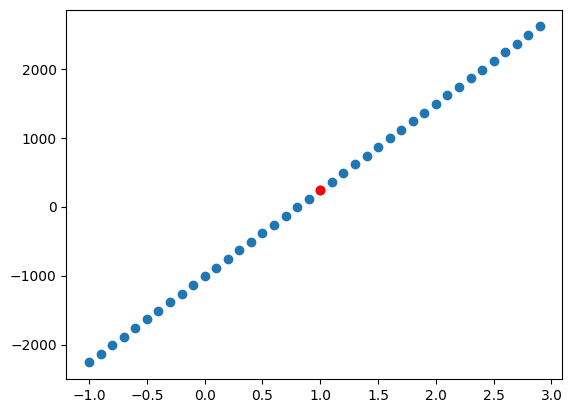

In [109]:
# Create a gradient function - this is the derivative of the loss function
gradient = lambda w, y: 2 * (w * 25 + 11.99 - y) * 25
gradients = gradient(ws, y)

# Plot the gradients
plt.scatter(ws, gradients)
plt.plot(1, gradient(1, y), "ro")

Update weights and biases to get to the point whereby the loss is the lowest

In [110]:
2 * (((25 * 1) + 11.99) - 32.2)

9.579999999999998

SInce b is directly related to the loss. We need to take the partial derivative of b w.r.t the loss

$\frac{\partial L}{\partial b}=\partial L$

The equation below is used to get the partial derivative of weight with respect to x * w

$\frac{\partial L}{\partial w}=\frac{\partial L}{\partial (x*w)}\frac{\partial (x*w)}{\partial w}$

In [111]:
9.58 * 25

239.5

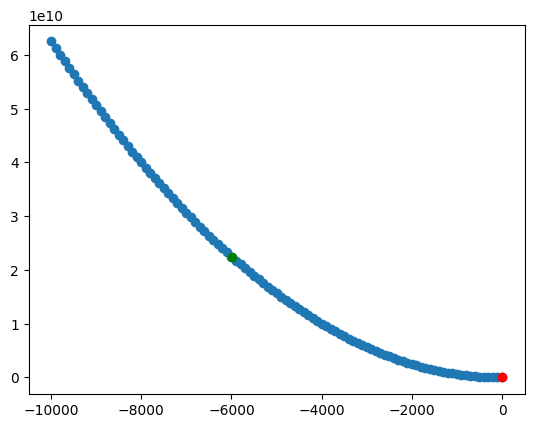

In [112]:
# Define weight values and losses
ws = np.arange(-10000, 100, 100)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), "ro")
new_weight = 1 - gradient(1, y) * 25
plt.plot(new_weight, loss(new_weight, y), "go")

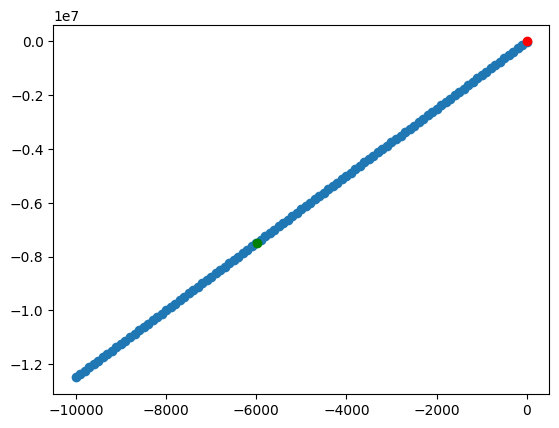

In [113]:
# Calculate gradient values for several weights
gradients = gradient(ws, y)

# Plot the weight and gradients
plt.scatter(ws, gradients)
plt.plot(1, gradient(1, y), "ro")

# New weight
plt.plot(new_weight, gradient(new_weight, y), "go")

#### Learning Rate

To adjust for the fact that the gradient is going to change, we use something called a learning rate. 

A learning rate reduces the size of the parameter update (new_weight = 1 - gradient(1, y) * 25) so that we do not take too large of a step.

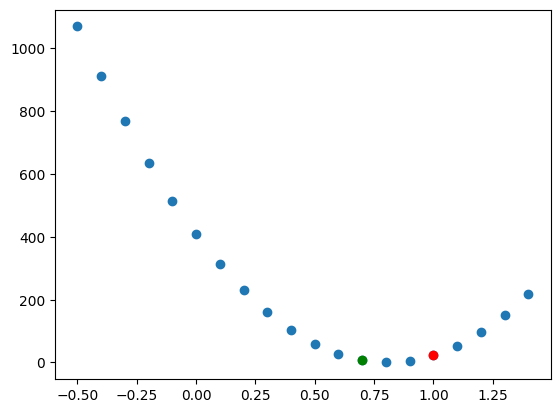

In [114]:
# Set weights and losses
ws = np.arange(-.5, 1.5, .1)
losses = loss(ws, y)

# Plot
plt.scatter(ws, losses)
plt.plot(1, loss(1, y), "ro")

# Set learning rate
learning_rate = 5e-5
new_weight = 1 - learning_rate * gradient(1, y) * 25

# Plot new weight, loss and y
plt.plot(new_weight, loss(new_weight, y), "go")

In [115]:
new_weight

0.700625

#### Implement Linear Regression

In [116]:
# Set predictors and targets
predictors = ["tmax", "tmin", "rain"]
target = "tmax_tomorrow"

# Split data into train, test and validation sets
np.random.seed(0)
split_data = np.split(data, [int(.6 * len(data)), int(.7 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[predictors].to_numpy(), d[[target]].to_numpy()] for d in split_data]

c:\Users\ntshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [117]:
# Import math
import math

def init_params(predictors):
    """
    Takes in the number of predictors available 
    and initialises the weights for these predictors 
    as well as initialise a single bias
    """
    # Set a random seed to ensure that the weights are 
    # the same every time and that the algorithm perfoms 
    # the same way every time
    np.random.seed(0)

    # initialise weights to random numbers between 0 and 1
    weights = np.random.rand(predictors, 1)

    # initialise a bias
    bias = np.ones((1, 1))

    # Return weights and bias
    return [weights, bias]


In [118]:
# Initialise parameters
params = init_params(3)
params

[array([[0.5488135 ],
        [0.71518937],
        [0.60276338]]),
 array([[1.]])]

In [119]:
def forward_pass(params, x):
    """
    Takes in the parameters and the input data, 
    makes a prediction and returns the output 
    of the model
    """
    # Pull out the weight and bias parameters
    weights, bias = params

    # Make a prediction - @ is a matrix multiplication 
    # symbol for elemental multiplication
    prediction = x @ weights + bias

    # Return the prediction
    return prediction

In [120]:
def mse(actual_temp, predicted_temp):
    """
    Takes in the actual temperature and the predicted 
    temperature and returns the mean squared error
    """
    # Calculate the mean squared error
    mse = np.mean((actual_temp - predicted_temp) ** 2)

    # Return the mean squared error
    return mse

In [121]:
def mse_gradient(actual_temp, predicted_temp):
    """
    Takes in the actual temperature and the predicted 
    temperature and returns the gradient
    """
    # Calculate the gradient
    gradient = predicted_temp - actual_temp

    # Return the gradient
    return gradient

In [122]:
def backward_pass(params, x, learning_rate, gradient):
    """
    Takes in the parameters, input data, learning rate 
    and gradient and updates the parameters
    """
    # Pull out the weight and bias parameters
    weights, bias = params

    # Calculate the weight and bias gradients
    weight_gradient = (x.T / x.shape[0]) @ gradient
    bias_gradient = np.mean(gradient, axis=0)

    # Update the weights
    params[0] -= weight_gradient * learning_rate

    # Update the bias
    params[1] -= bias_gradient * learning_rate

    # Return the updated parameters
    return params

#### Create a Training Loop

In [126]:
# Set a learning rate and a number of epochs
learning_rate = 1e-4
epochs = 5000

# Initialize parameters
params = init_params(train_x.shape[1])

# loop through each epoch
for epoch in range(epochs):
    # Make predictions
    predictions = forward_pass(params, train_x)

    # Calculate mse gradient
    gradient = mse_gradient(train_y, predictions)

    # Update the parameters
    params = backward_pass(params, train_x, learning_rate, gradient)

    if epoch % 500 == 0:
         # Print out validation error
         predictions = forward_pass(params, valid_x)

         # Calculate the mse 
         valid_loss = mse(valid_y, predictions)

         # Return output in message
         print(f"Epoch {epoch}: {valid_loss}")

Epoch 0: 41.43923305827977
Epoch 500: 34.95270985178218
Epoch 1000: 33.88042052278814
Epoch 1500: 33.70236338319178
Epoch 2000: 33.669656663618035
Epoch 2500: 33.661785826555054
Epoch 3000: 33.65862292174586
Epoch 3500: 33.65652235454567
Epoch 4000: 33.65471804020103
Epoch 4500: 33.65301264054181


In [127]:
params

[array([[0.79513537],
        [0.24085245],
        [0.57054254]]),
 array([[1.04668891]])]